In [34]:
import pandas as pd
import matplotlib as plt
import xlrd
from treelib import Node, Tree

In [32]:
pip install treelib

  Created wheel for treelib: filename=treelib-1.6.1-py3-none-any.whl size=18374 sha256=91e1cf07aec24da5a167f9227a7f86bf35ef0312be651e0d768cd2a85153de8e
  Stored in directory: c:\users\benja\appdata\local\pip\cache\wheels\89\be\94\2c6d949ce599d1443426d83ba4dc93cd35c0f4638260930a53
Successfully built treelib
Note: you may need to restart the kernel to use updated packages.


In [ ]:
Value_of_Marketable_Debt_Securities = pd.read_excel('http://eh.net/wp-content/uploads/2013/11/Figure-9-Value-of-Marketable-Debt-Securities.xls')
Public_Debt_Percent_GDP = pd.read_excel('http://eh.net/wp-content/uploads/2013/11/Figure-19-Public-Debt-as-Percent-of-GDP.xls')
Debt_Breakdown = pd.read_excel('http://eh.net/wp-content/uploads/2013/11/Figures-345-Debt-Breakdown.xls')
Series_Values = pd.read_excel('http://eh.net/wp-content/uploads/2013/11/Figures-10-11-12-Series-Values.xls')
Marketable_and_Nonmarketable = pd.read_excel('http://eh.net/wp-content/uploads/2013/11/Figure-6-Marketable-and-Nonmarketable.xls')
Nominal_Real_Public_Debt = pd.read_excel('http://eh.net/wp-content/uploads/2013/11/Figure-1-14-15-18-Nominal-and-Real-Public-Debt-1789-2003.xls')

In [74]:
>>> tree = Tree()
>>> tree.create_node("Debt breakdown", "Debt breakdown")  # root node

>>> tree.create_node("1. Matured debt", "Matured debt", parent='Debt breakdown')
>>> tree.create_node("2. Debt bearing no interest", "Debt bearing no interest", parent='Debt breakdown')
>>> tree.create_node("3. Interest-bearing debt", "Interest-bearing debt", parent='Debt breakdown')
>>> tree.create_node("3.1 Marketable debt", "Marketable debt", parent='Interest-bearing debt')
>>> tree.create_node("Treasuries certificate", "Treasuries certificate", parent='Marketable debt')
>>> tree.create_node("Treasury bill", "Treasury bill", parent='Marketable debt')
>>> tree.create_node("Treasury note", "Treasury note", parent='Marketable debt')
>>> tree.create_node("Treasury bond", "Treasury bond", parent='Marketable debt')
>>> tree.create_node("3.2 Nonmarketable debt", "Nonmarketable debt", parent="Interest-bearing debt")
>>> tree.create_node("Depositary Series", "Depositary Series", parent="Nonmarketable debt")
>>> tree.create_node("Foreign Government Series", "Foreign Government Series", parent="Depositary Series")
>>> tree.create_node("Government Account Series", "Government Account Series", parent="Depositary Series")
>>> tree.create_node("Investment Series", "Investment Series", parent="Depositary Series")
>>> tree.create_node("REA Series", "REA Series", parent="Depositary Series")
>>> tree.create_node("SLG Series", "SLG Series", parent='Depositary Series')
>>> tree.show()

Debt breakdown
├── 1. Matured debt
├── 2. Debt bearing no interest
└── 3. Interest-bearing debt
    ├── 3.1 Marketable debt
    │   ├── Treasuries certificate
    │   ├── Treasury bill
    │   ├── Treasury bond
    │   └── Treasury note
    └── 3.2 Nonmarketable debt
        └── Depositary Series
            ├── Foreign Government Series
            ├── Government Account Series
            ├── Investment Series
            ├── REA Series
            └── SLG Series



1. EDA

In [3]:
Value_of_Marketable_Debt_Securities.head()

,Unnamed: 0,Bills,Certificates,Notes,Bonds
0,1861,NaN,0.0,22.0,68.0
1,1862,NaN,108.0,128.0,128.0
2,1863,NaN,263.0,144.0,300.0
3,1864,NaN,239.0,353.0,767.0
4,1865,NaN,208.0,912.0,1100.0


In [4]:
Value_of_Marketable_Debt_Securities.rename(columns={"Unnamed: 0": "Year"}, inplace=True)
Value_of_Marketable_Debt_Securities.drop(Value_of_Marketable_Debt_Securities.tail(2).index,inplace=True) 

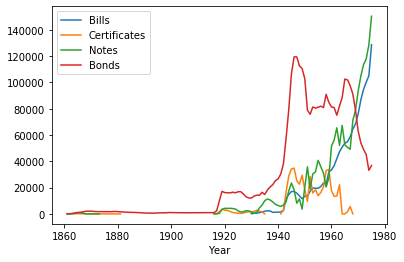

In [5]:
Value_of_Marketable_Debt_Securities.set_index('Year').plot()

In [6]:
Value_of_Marketable_Debt_Securities.set_index('Year', inplace=True)
Value_of_Marketable_Debt_Securities['Total']=Value_of_Marketable_Debt_Securities.sum(axis=1)
Value_of_Marketable_Debt_Securities

,Bills,Certificates,Notes,Bonds,Total
Year,,,,,
1861,NaN,0.0,22.0,68.0,90.0
1862,NaN,108.0,128.0,128.0,364.0
1863,NaN,263.0,144.0,300.0,707.0
1864,NaN,239.0,353.0,767.0,1359.0
1865,NaN,208.0,912.0,1100.0,2220.0
...,...,...,...,...,...
1971,86677.0,NaN,104807.0,53989.0,245473.0
1972,94648.0,NaN,113419.0,49135.0,257202.0
1973,100061.0,NaN,117840.0,45071.0,262972.0


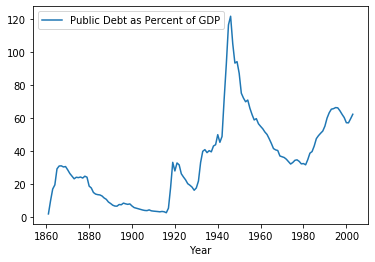

In [7]:
Public_Debt_Percent_GDP.rename(columns={"Unnamed: 0": "Year"}, inplace=True)
Public_Debt_Percent_GDP.set_index('Year').plot()

In [8]:
Debt_Breakdown.rename(columns={"Unnamed: 0": "Year"}, inplace=True)

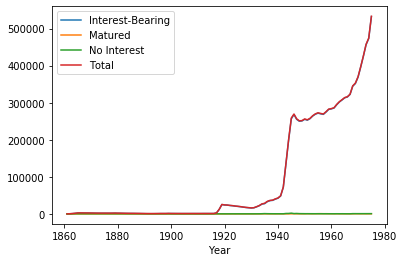

In [25]:
Debt_Breakdown.set_index('Year').plot()

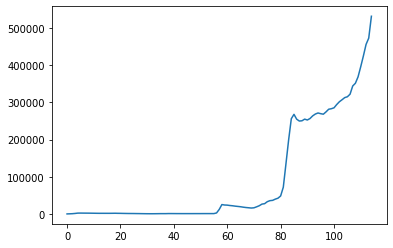

In [28]:
Debt_Breakdown['Interest-Bearing'].plot()

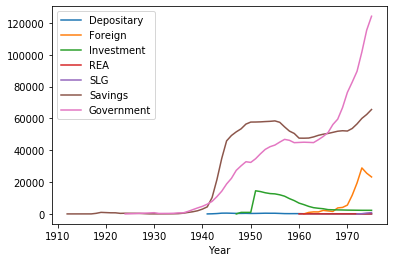

In [19]:
Series_Values.rename(columns={"Unnamed: 0": "Year"}, inplace=True)
Series_Values.set_index('Year').plot()

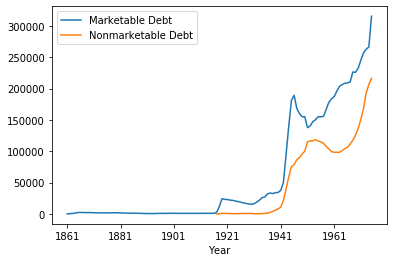

In [20]:
Marketable_and_Nonmarketable.rename(columns={"Unnamed: 0": "Year"}, inplace=True)
Marketable_and_Nonmarketable.set_index('Year').plot()

In [77]:
Marketable_and_Nonmarketable.tail()

,Year,Marketable Debt,Nonmarketable Debt
112,1973,262972.0,193381.0
113,1974,266575.0,206663.0
114,1975,315605.0,216517.0
115,NaN,NaN,NaN
116,Total Marketable Debt excludes debt paying 0% ...,NaN,NaN


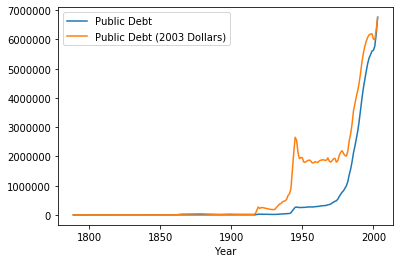

In [21]:
Nominal_Real_Public_Debt.rename(columns={"Unnamed: 0": "Year"}, inplace=True)
Nominal_Real_Public_Debt.set_index('Year').plot()

2. Analysis

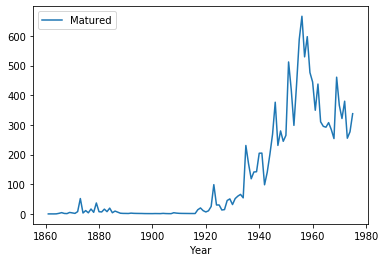

In [73]:
Matured_Debt = [Debt_Breakdown['Year'],Debt_Breakdown['Matured']]
Matured_Debt = pd.concat(Matured_Debt, axis=1)
Matured_Debt.set_index('Year').plot()

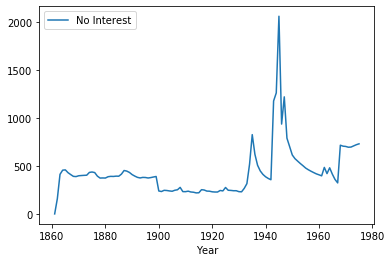

In [78]:
No_Interest = [Debt_Breakdown['Year'],Debt_Breakdown['No Interest']]
No_Interest = pd.concat(No_Interest, axis=1)
No_Interest.set_index('Year').plot()